In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt
from collections import Counter


exec(open('utils.py').read())
print('Loaded')


def pct_dist(a=None, b=None, mean=None, sd=None):
    if a is not None:
        return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 
    else:
        return sq.lognorm(lognorm_mean=mean, lognorm_sd=sd, lclip=0.001, rclip=1, credibility=80) 


def lab_spend_on_largest_model_this_year(total_investment,
                                         total_revenue,
                                         percent_investment_spent_this_year,
                                         percent_revenue_that_is_profit,
                                         percent_profit_spent_this_year,
                                         percent_spend_on_compute,
                                         percent_compute_on_biggest_model):
    money = total_investment * percent_investment_spent_this_year
    money += total_revenue * percent_revenue_that_is_profit * percent_profit_spent_this_year
    return sq.dist_fn(money * percent_spend_on_compute * percent_compute_on_biggest_model, fn=np.log10)


def bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                             percent_r_and_d_on_ai,
                                             percent_ai_spend_on_compute,
                                             percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)
    

print('Loaded')

Loaded
Loaded


## GPT3 Prediction (for calibration)

## Model predicts GPT-3 spend will be ##
{1: '183.0 thousand',
 5: '370.2 thousand',
 10: '537.3 thousand',
 20: '838.0 thousand',
 30: '1.2 million',
 40: '1.5 million',
 50: '2.0 million',
 60: '2.5 million',
 70: '3.3 million',
 80: '4.6 million',
 90: '7.3 million',
 95: '10.5 million',
 99: '21.0 million'}
-
## Actual GPT-3 estimated to be ##
{1: '179.8 thousand',
 5: '323.4 thousand',
 10: '439.5 thousand',
 20: '640.2 thousand',
 30: '837.7 thousand',
 40: '1.0 million',
 50: '1.3 million',
 60: '1.6 million',
 70: '2.0 million',
 80: '2.6 million',
 90: '3.8 million',
 95: '5.2 million',
 99: '9.3 million'}
-
Actual spend on GPT-3 ($1.3M) is at the 34.2th percentile of the model
-


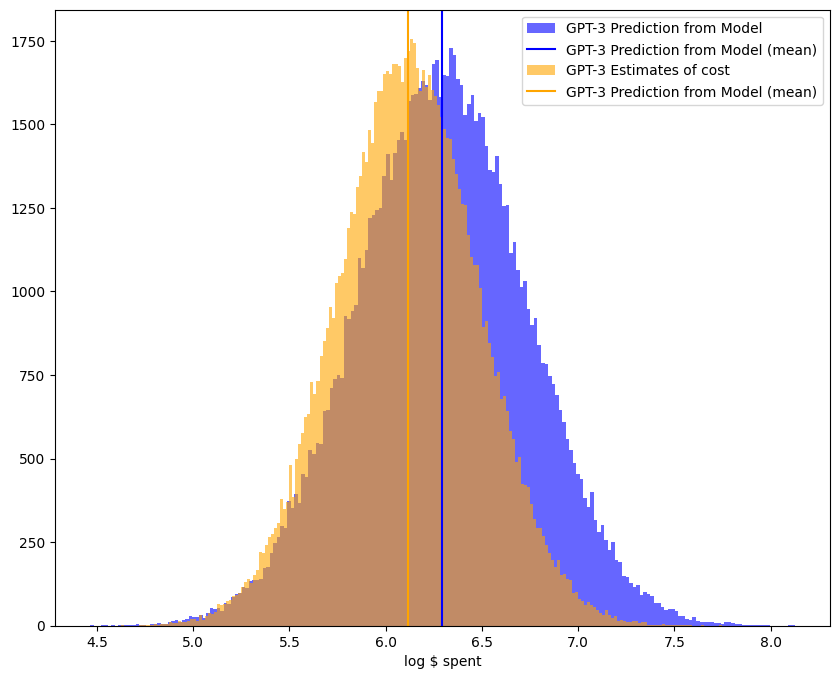

In [2]:
gpt3_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.2),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt3_spend = 1.3*M

plot_model_versus_estimate('GPT-3', samples, actual_gpt3_spend)

## GPT4 Prediction (for calibration)

## Model predicts GPT-4 spend will be ##
{1: '3.6 million',
 5: '5.6 million',
 10: '7.0 million',
 20: '9.3 million',
 30: '11.4 million',
 40: '13.5 million',
 50: '15.8 million',
 60: '18.5 million',
 70: '22.0 million',
 80: '26.8 million',
 90: '35.3 million',
 95: '44.2 million',
 99: '67.9 million'}
-
## Actual GPT-4 estimated to be ##
{1: '3.3 million',
 5: '5.8 million',
 10: '7.9 million',
 20: '11.4 million',
 30: '15.0 million',
 40: '18.9 million',
 50: '23.5 million',
 60: '29.0 million',
 70: '36.3 million',
 80: '47.5 million',
 90: '68.7 million',
 95: '93.9 million',
 99: '166.2 million'}
-
Actual spend on GPT-4 ($23.3M) is at the 73.2th percentile of the model
-


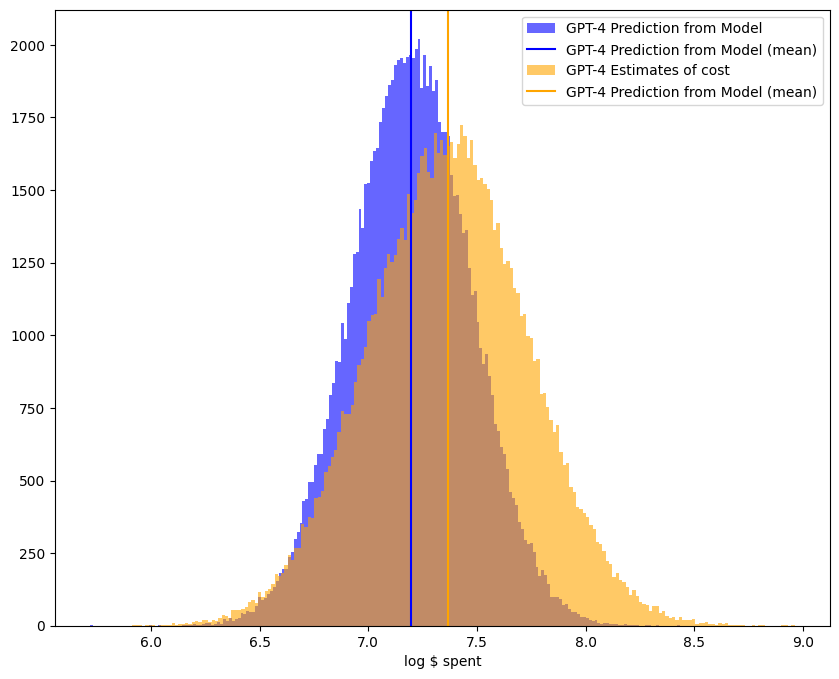

In [3]:
gpt4_prediction = lab_spend_on_largest_model_this_year(total_investment=1*B,
                                                       total_revenue=0,
                                                       percent_investment_spent_this_year=pct_dist(0.2, 0.5),
                                                       percent_revenue_that_is_profit=0,
                                                       percent_profit_spent_this_year=0,
                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
samples = gpt4_prediction @ (100*K)

# https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gpt4_spend = 23.3*M

plot_model_versus_estimate('GPT-4', samples, actual_gpt4_spend)

## Gemini Ultra Prediction (for calibration)

## Model predicts Gemini Ultra spend will be ##
{1: '2.5 million',
 5: '7.3 million',
 10: '13.2 million',
 20: '27.6 million',
 30: '46.5 million',
 40: '73.1 million',
 50: '110.9 million',
 60: '168.3 million',
 70: '263.0 million',
 80: '441.3 million',
 90: '895.3 million',
 95: '1.6 billion',
 99: '4.6 billion'}
-
## Actual Gemini Ultra estimated to be ##
{1: '4.6 million',
 5: '8.1 million',
 10: '11.0 million',
 20: '15.9 million',
 30: '20.7 million',
 40: '25.9 million',
 50: '32.0 million',
 60: '39.5 million',
 70: '49.7 million',
 80: '65.0 million',
 90: '94.2 million',
 95: '128.0 million',
 99: '227.2 million'}
-
Actual spend on Gemini Ultra ($32.1M) is at the 22.7th percentile of the model
-


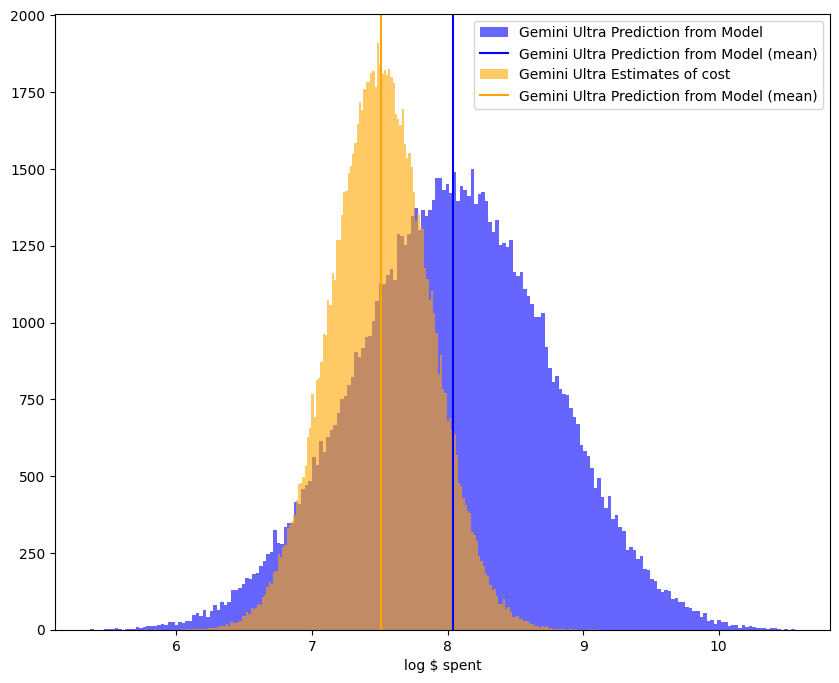

In [4]:
gemini_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 50*B, credibility=80),
                                                             percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                             percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                             percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
samples = gemini_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=737092838
actual_gemini_spend = 32.1*M

plot_model_versus_estimate('Gemini Ultra', samples, actual_gemini_spend)

## Mistral Large Prediction (for calibration)

## Model predicts Mistral large spend will be ##
{1: '3.1 million',
 5: '5.1 million',
 10: '6.7 million',
 20: '9.2 million',
 30: '11.6 million',
 40: '14.2 million',
 50: '17.1 million',
 60: '20.7 million',
 70: '25.2 million',
 80: '31.8 million',
 90: '44.2 million',
 95: '57.8 million',
 99: '95.5 million'}
-
## Actual Mistral large estimated to be ##
{1: '2.8 million',
 5: '5.0 million',
 10: '6.8 million',
 20: '9.8 million',
 30: '12.8 million',
 40: '16.2 million',
 50: '20.0 million',
 60: '24.8 million',
 70: '31.2 million',
 80: '40.9 million',
 90: '59.0 million',
 95: '80.0 million',
 99: '142.6 million'}
-
Actual spend on Mistral large ($20.0M) is at the 58.3th percentile of the model
-


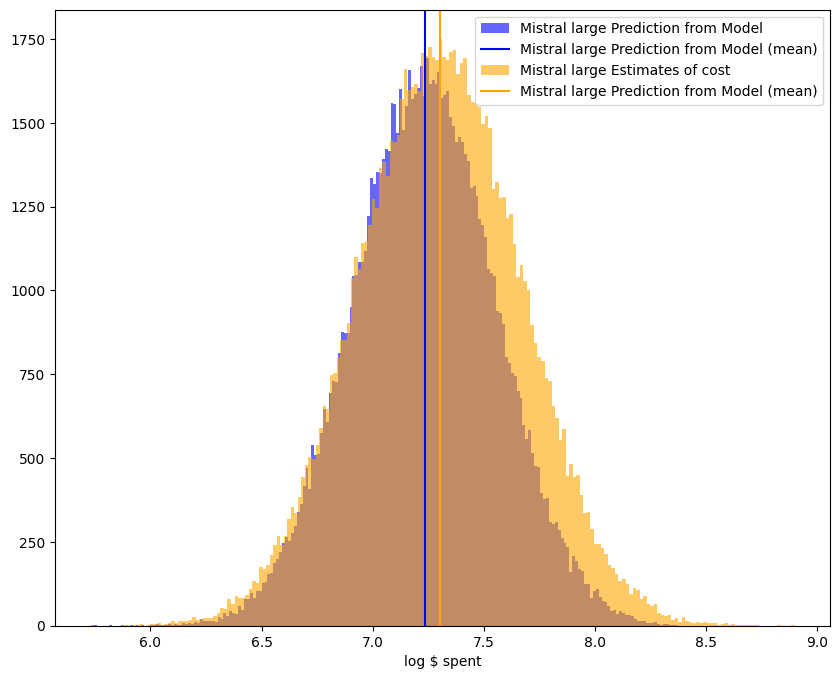

In [5]:
mistral_prediction = lab_spend_on_largest_model_this_year(total_investment=600*M,
                                                          total_revenue=0,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_revenue_that_is_profit=0,
                                                          percent_profit_spent_this_year=0,
                                                          percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                          percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
samples = mistral_prediction @ (100*K)

# 2e25 FLOP per https://epochai.org/blog/tracking-compute-intensive-ai-models
# Guess ~1e18 FLOP per $
# = 2e7 cost
actual_mistral_spend = 20*M

plot_model_versus_estimate('Mistral large', samples, actual_mistral_spend)

## Model for Largest Training Run by EOY2025

## SPEND ESTIMATE ##

$215.7 million (80%CI: $56.8 million to $834.1 million)

{1: '19.2 million',
 5: '38.8 million',
 10: '56.8 million',
 20: '89.1 million',
 30: '123.9 million',
 40: '164.2 million',
 50: '213.6 million',
 60: '278.7 million',
 70: '371.2 million',
 80: '521.9 million',
 90: '834.1 million',
 95: '1.2 billion',
 99: '2.5 billion'}



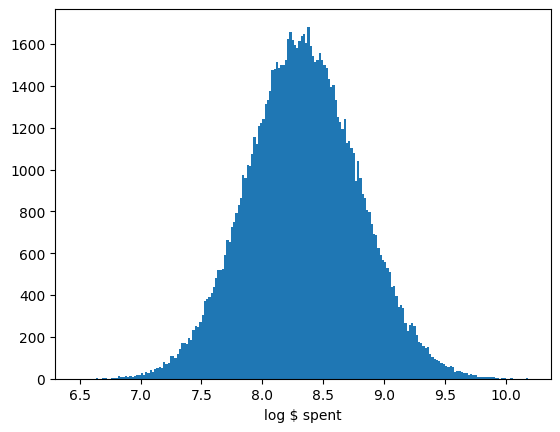



## FLOP ESTIMATE ##

27.13 log FLOP (80%CI: 26.39 to 27.88 log FLOP)

{1: 25.78,
 5: 26.18,
 10: 26.39,
 20: 26.64,
 30: 26.83,
 40: 26.98,
 50: 27.13,
 60: 27.28,
 70: 27.44,
 80: 27.62,
 90: 27.88,
 95: 28.1,
 99: 28.5}



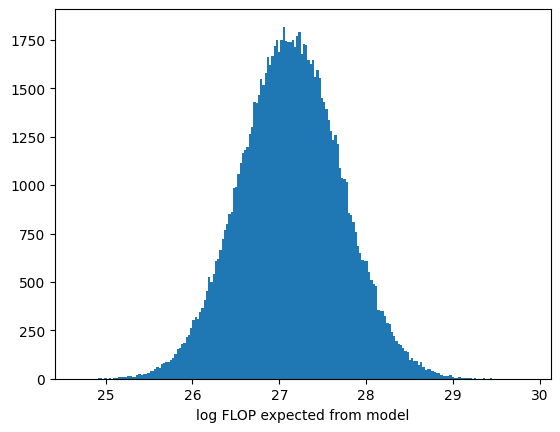

In [6]:
largest_openai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(10*B, 70*B),
                                                                       total_revenue=sq.lognorm(3*B, 12*B),
                                                                       percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                       percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                       percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                       percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))

show_model_forecast(largest_openai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$120.0 million (80%CI: $33.3 million to $438.0 million)

{1: '11.8 million',
 5: '23.1 million',
 10: '33.3 million',
 20: '51.5 million',
 30: '70.6 million',
 40: '92.7 million',
 50: '119.4 million',
 60: '154.2 million',
 70: '203.0 million',
 80: '278.8 million',
 90: '438.0 million',
 95: '636.0 million',
 99: '1.3 billion'}



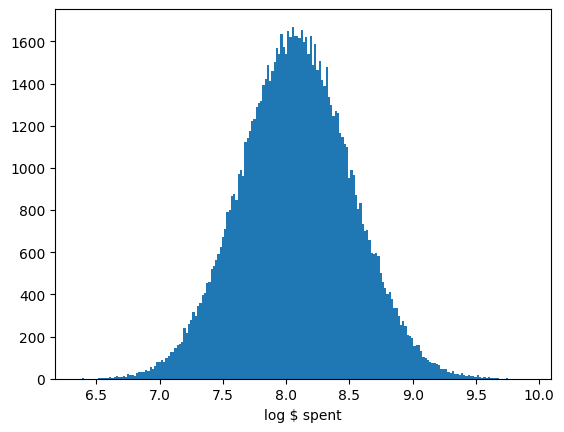



## FLOP ESTIMATE ##

26.88 log FLOP (80%CI: 26.15 to 27.61 log FLOP)

{1: 25.57,
 5: 25.95,
 10: 26.15,
 20: 26.4,
 30: 26.58,
 40: 26.74,
 50: 26.88,
 60: 27.02,
 70: 27.18,
 80: 27.36,
 90: 27.61,
 95: 27.82,
 99: 28.21}



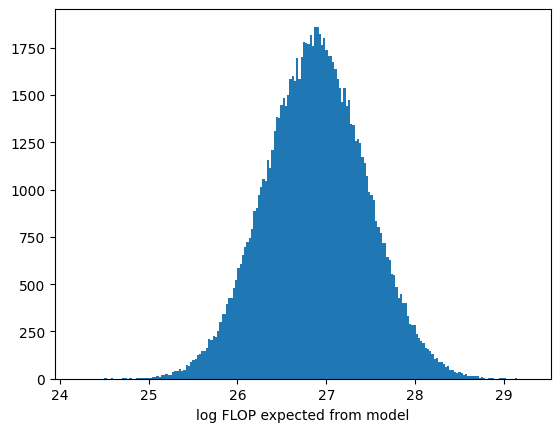

In [7]:
largest_anthropic_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(3*B, 25*B),
                                                                          total_revenue=sq.lognorm(1*B, 8*B),
                                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.4),
                                                                          percent_revenue_that_is_profit=pct_dist(0.05, 0.5),
                                                                          percent_profit_spent_this_year=pct_dist(0.05, 1),
                                                                          percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                          percent_compute_on_biggest_model=pct_dist(mean=0.15, sd=0.05))
show_model_forecast(largest_anthropic_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$147.1 million (80%CI: $17.1 million to $1.3 billion)

{1: '3.0 million',
 5: '9.2 million',
 10: '17.1 million',
 20: '35.6 million',
 30: '61.1 million',
 40: '96.2 million',
 50: '148.1 million',
 60: '225.9 million',
 70: '358.1 million',
 80: '607.1 million',
 90: '1.3 billion',
 95: '2.3 billion',
 99: '6.8 billion'}



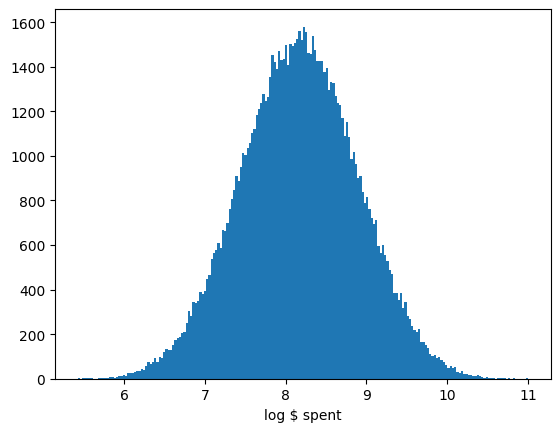



## FLOP ESTIMATE ##

26.97 log FLOP (80%CI: 25.92 to 28.01 log FLOP)

{1: 25.08,
 5: 25.62,
 10: 25.92,
 20: 26.28,
 30: 26.54,
 40: 26.76,
 50: 26.97,
 60: 27.18,
 70: 27.4,
 80: 27.65,
 90: 28.01,
 95: 28.31,
 99: 28.83}



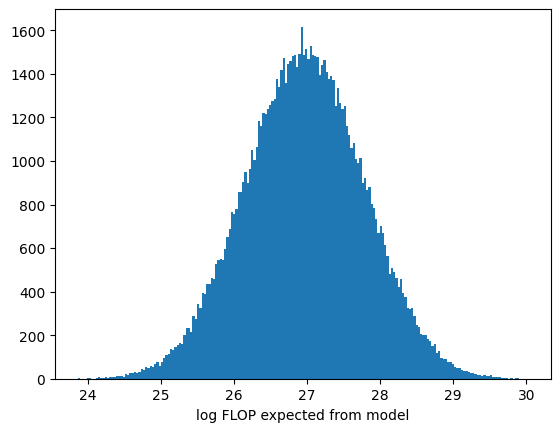

In [8]:
largest_google_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(35*B, 90*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.6),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.15))
show_model_forecast(largest_google_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$26.9 million (80%CI: $2.6 million to $305.6 million)

{1: '761.4 thousand',
 5: '1.6 million',
 10: '2.6 million',
 20: '5.1 million',
 30: '9.1 million',
 40: '15.2 million',
 50: '24.9 million',
 60: '40.9 million',
 70: '69.5 million',
 80: '128.8 million',
 90: '305.6 million',
 95: '614.9 million',
 99: '2.3 billion'}



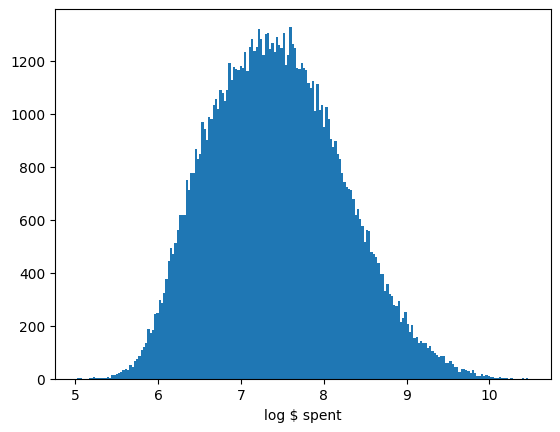



## FLOP ESTIMATE ##

26.23 log FLOP (80%CI: 25.12 to 27.38 log FLOP)

{1: 24.42,
 5: 24.86,
 10: 25.12,
 20: 25.46,
 30: 25.73,
 40: 25.97,
 50: 26.2,
 60: 26.44,
 70: 26.68,
 80: 26.97,
 90: 27.38,
 95: 27.71,
 99: 28.31}



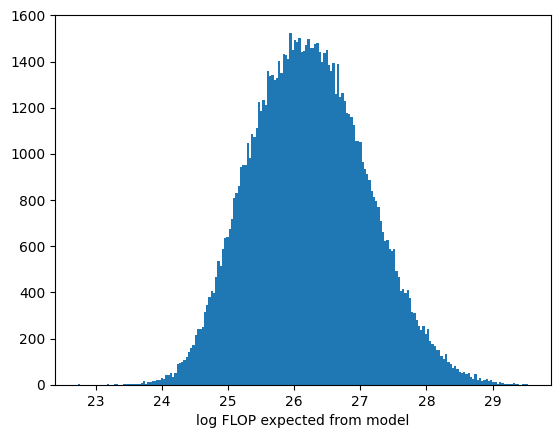

In [9]:
largest_microsoft_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(22*B, 90*B, credibility=80),
                                                                              percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                              percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                              percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
show_model_forecast(largest_microsoft_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$47.0 million (80%CI: $3.1 million to $706.4 million)

{1: '371.2 thousand',
 5: '1.5 million',
 10: '3.1 million',
 20: '7.9 million',
 30: '15.4 million',
 40: '27.2 million',
 50: '46.8 million',
 60: '80.4 million',
 70: '144.4 million',
 80: '281.7 million',
 90: '706.4 million',
 95: '1.5 billion',
 99: '5.4 billion'}



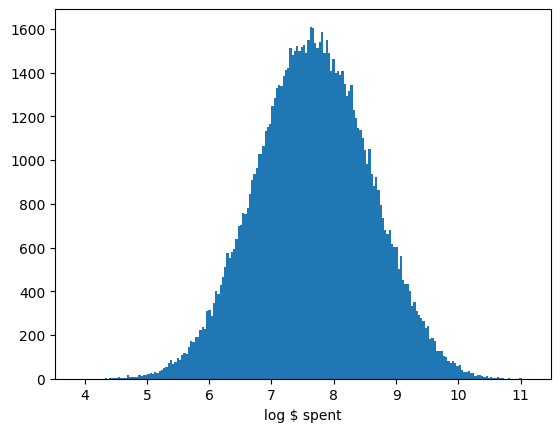



## FLOP ESTIMATE ##

26.47 log FLOP (80%CI: 25.21 to 27.74 log FLOP)

{1: 24.2,
 5: 24.86,
 10: 25.21,
 20: 25.64,
 30: 25.95,
 40: 26.22,
 50: 26.47,
 60: 26.73,
 70: 26.99,
 80: 27.31,
 90: 27.74,
 95: 28.08,
 99: 28.71}



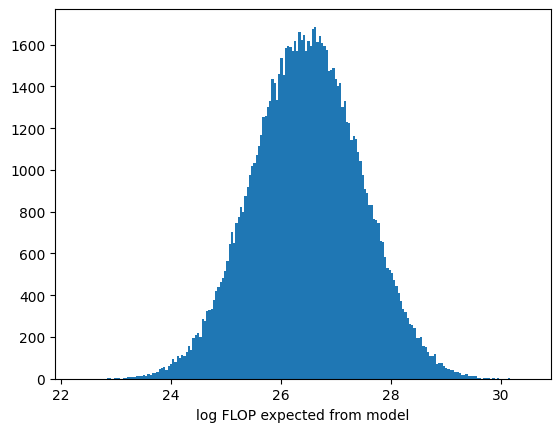

In [10]:
largest_fb_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(20*B, 90*B, credibility=80),
                                                                       percent_r_and_d_on_ai=pct_dist(0.01, 0.4),
                                                                       percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                       percent_compute_on_biggest_model=pct_dist(0.005, 0.2))
show_model_forecast(largest_fb_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$45.5 million (80%CI: $4.6 million to $446.0 million)

{1: '702.8 thousand',
 5: '2.4 million',
 10: '4.6 million',
 20: '10.1 million',
 30: '18.0 million',
 40: '29.1 million',
 50: '46.1 million',
 60: '72.4 million',
 70: '116.4 million',
 80: '204.9 million',
 90: '446.0 million',
 95: '844.8 million',
 99: '2.7 billion'}



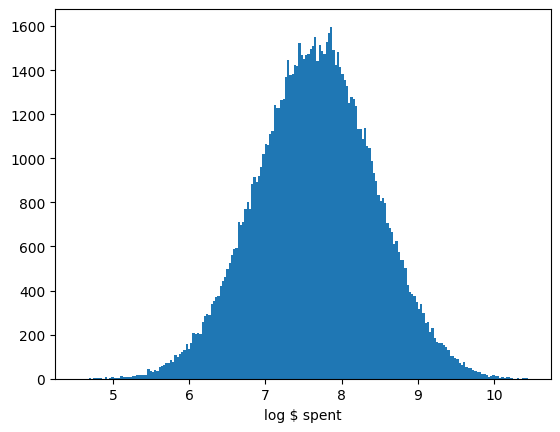



## FLOP ESTIMATE ##

26.46 log FLOP (80%CI: 25.36 to 27.55 log FLOP)

{1: 24.46,
 5: 25.04,
 10: 25.36,
 20: 25.74,
 30: 26.01,
 40: 26.25,
 50: 26.46,
 60: 26.68,
 70: 26.91,
 80: 27.18,
 90: 27.55,
 95: 27.86,
 99: 28.41}



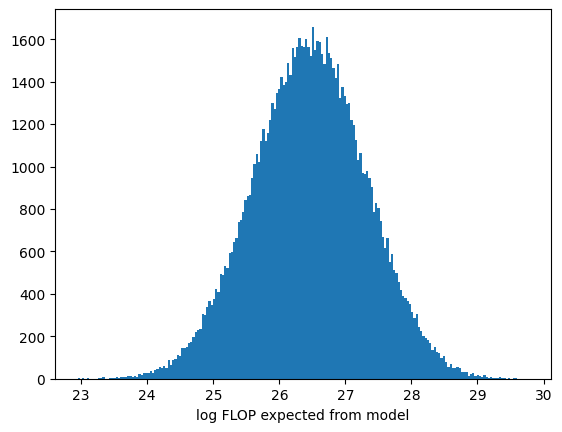

In [11]:
largest_amazon_model_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(50*B, 90*B, credibility=80),
                                                                           percent_r_and_d_on_ai=pct_dist(0.01, 0.3),
                                                                           percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                           percent_compute_on_biggest_model=pct_dist(0.005, 0.1))
show_model_forecast(largest_amazon_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$69.9 million (80%CI: $21.3 million to $228.0 million)

{1: '8.1 million',
 5: '15.2 million',
 10: '21.3 million',
 20: '32.0 million',
 30: '43.1 million',
 40: '55.5 million',
 50: '69.9 million',
 60: '89.0 million',
 70: '114.1 million',
 80: '152.3 million',
 90: '228.0 million',
 95: '318.6 million',
 99: '602.2 million'}



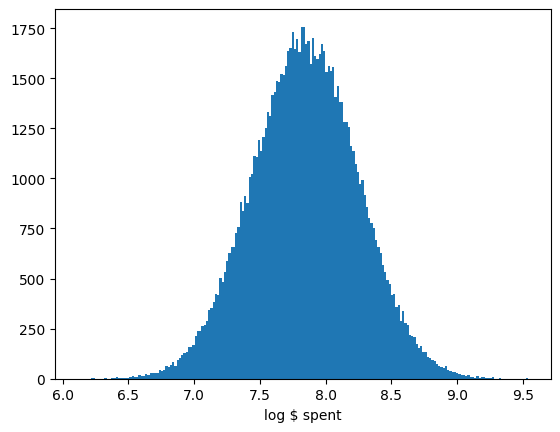



## FLOP ESTIMATE ##

26.64 log FLOP (80%CI: 25.95 to 27.34 log FLOP)

{1: 25.39,
 5: 25.75,
 10: 25.95,
 20: 26.19,
 30: 26.36,
 40: 26.51,
 50: 26.64,
 60: 26.78,
 70: 26.93,
 80: 27.1,
 90: 27.34,
 95: 27.53,
 99: 27.9}



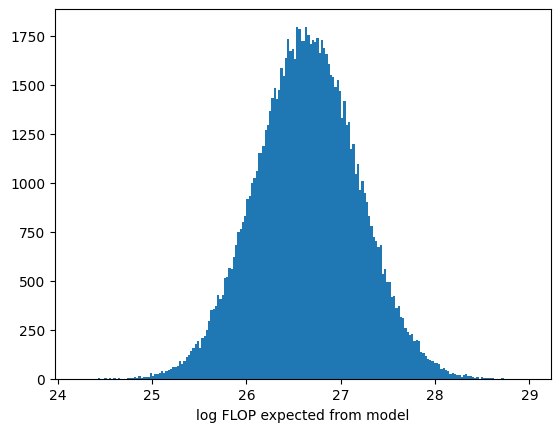

In [12]:
largest_mistral_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1.2*B, 5*B, credibility=80),
                                                                        total_revenue=0,
                                                                        percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                        percent_revenue_that_is_profit=0,
                                                                        percent_profit_spent_this_year=0,
                                                                        percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                        percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_mistral_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$255.8 million (80%CI: $74.1 million to $885.1 million)

{1: '27.2 million',
 5: '52.0 million',
 10: '74.1 million',
 20: '113.5 million',
 30: '154.6 million',
 40: '200.8 million',
 50: '256.4 million',
 60: '327.2 million',
 70: '423.9 million',
 80: '577.0 million',
 90: '885.1 million',
 95: '1.2 billion',
 99: '2.4 billion'}



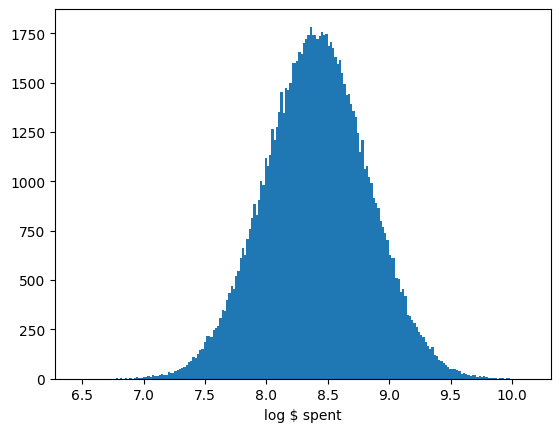



## FLOP ESTIMATE ##

27.21 log FLOP (80%CI: 26.5 to 27.92 log FLOP)

{1: 25.92,
 5: 26.3,
 10: 26.5,
 20: 26.74,
 30: 26.92,
 40: 27.07,
 50: 27.21,
 60: 27.35,
 70: 27.5,
 80: 27.68,
 90: 27.92,
 95: 28.12,
 99: 28.49}



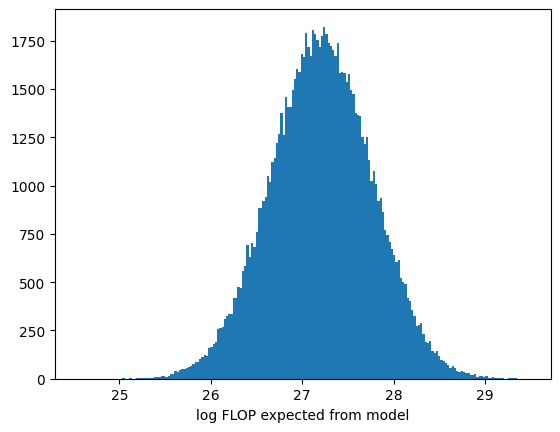

In [13]:
largest_xai_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(4*B, 20*B, credibility=80),
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.4, sd=0.05))
show_model_forecast(largest_xai_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$192.5 million (80%CI: $115.5 million to $321.3 million)

{1: '76.5 million',
 5: '100.1 million',
 10: '115.5 million',
 20: '137.6 million',
 30: '156.5 million',
 40: '174.1 million',
 50: '192.2 million',
 60: '212.9 million',
 70: '237.2 million',
 80: '269.3 million',
 90: '321.3 million',
 95: '370.7 million',
 99: '484.4 million'}



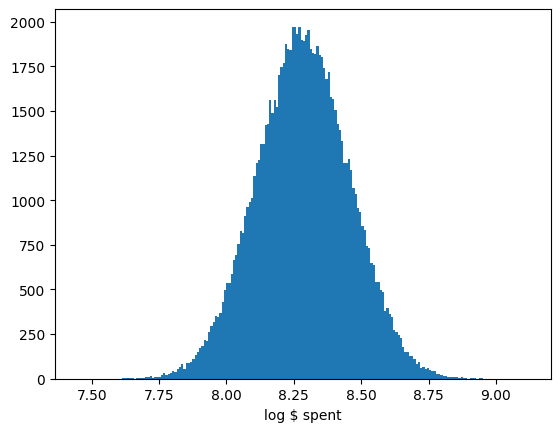



## FLOP ESTIMATE ##

27.09 log FLOP (80%CI: 26.57 to 27.6 log FLOP)

{1: 26.15,
 5: 26.42,
 10: 26.57,
 20: 26.74,
 30: 26.88,
 40: 26.98,
 50: 27.09,
 60: 27.19,
 70: 27.3,
 80: 27.42,
 90: 27.6,
 95: 27.75,
 99: 28.02}



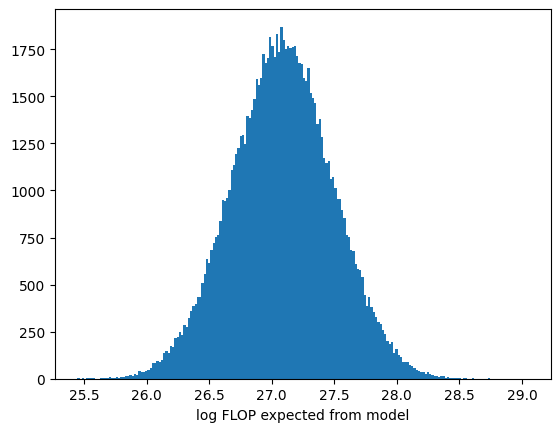

In [14]:
largest_ssi_model_prediction = lab_spend_on_largest_model_this_year(total_investment=sq.lognorm(1*B, 2*B, credibility=80),
                                                                    total_revenue=0,
                                                                    percent_investment_spent_this_year=pct_dist(0.3, 0.5),
                                                                    percent_revenue_that_is_profit=0,
                                                                    percent_profit_spent_this_year=0,
                                                                    percent_spend_on_compute=pct_dist(mean=0.6, sd=0.12),
                                                                    percent_compute_on_biggest_model=pct_dist(mean=0.6, sd=0.05))
show_model_forecast(largest_ssi_model_prediction @ (100*K))

## SPEND ESTIMATE ##

$28.3 million (80%CI: $1.6 million to $498.5 million)

{1: '150.4 thousand',
 5: '703.2 thousand',
 10: '1.6 million',
 20: '4.3 million',
 30: '8.8 million',
 40: '16.0 million',
 50: '28.2 million',
 60: '49.5 million',
 70: '91.5 million',
 80: '184.0 million',
 90: '498.5 million',
 95: '1.1 billion',
 99: '5.4 billion'}



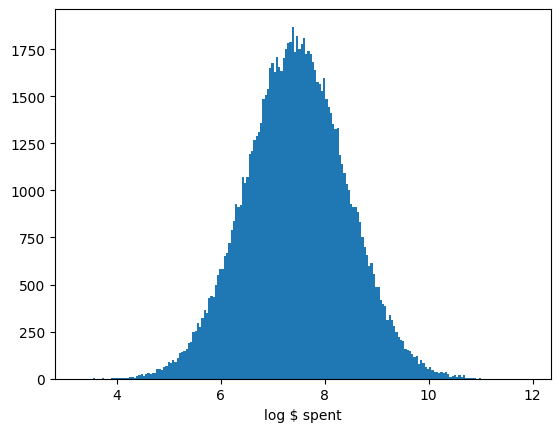



## FLOP ESTIMATE ##

26.25 log FLOP (80%CI: 24.92 to 27.58 log FLOP)

{1: 23.82,
 5: 24.55,
 10: 24.92,
 20: 25.38,
 30: 25.71,
 40: 25.99,
 50: 26.25,
 60: 26.51,
 70: 26.79,
 80: 27.13,
 90: 27.58,
 95: 27.97,
 99: 28.69}



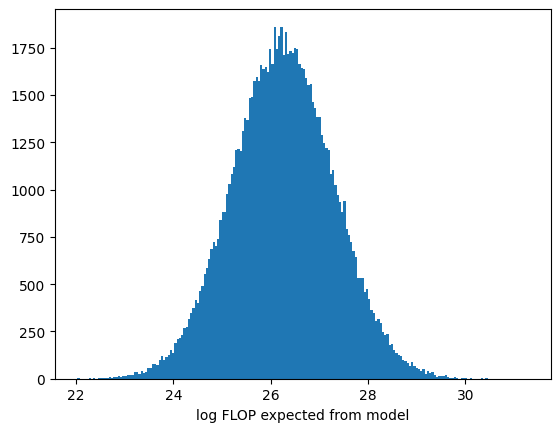

In [15]:
largest_us_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 20*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                                     percent_compute_on_biggest_model=pct_dist(mean=0.05, sd=0.05))
show_model_forecast(largest_us_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$478.9 thousand (80%CI: $95.7 thousand to $2.5 million)

{1: '28.8 thousand',
 5: '62.2 thousand',
 10: '95.7 thousand',
 20: '162.7 thousand',
 30: '242.0 thousand',
 40: '340.6 thousand',
 50: '468.1 thousand',
 60: '649.1 thousand',
 70: '917.3 thousand',
 80: '1.4 million',
 90: '2.5 million',
 95: '3.9 million',
 99: '9.7 million'}



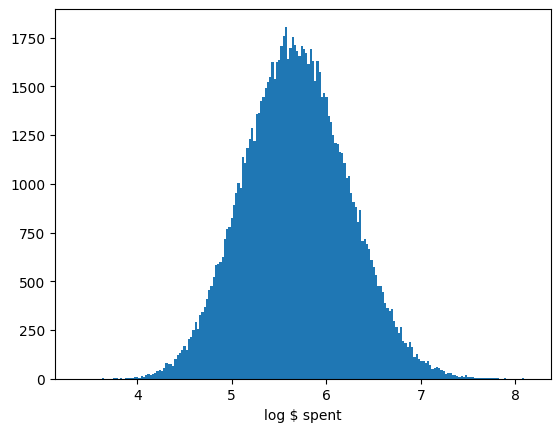



## FLOP ESTIMATE ##

24.48 log FLOP (80%CI: 23.64 to 25.33 log FLOP)

{1: 23.0,
 5: 23.41,
 10: 23.64,
 20: 23.92,
 30: 24.13,
 40: 24.3,
 50: 24.47,
 60: 24.64,
 70: 24.82,
 80: 25.03,
 90: 25.33,
 95: 25.57,
 99: 26.04}



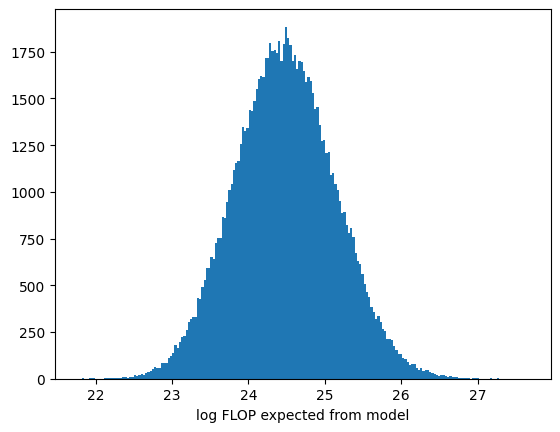

In [16]:
largest_uk_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 1*B, credibility=80),
                                                                     percent_r_and_d_on_ai=1,
                                                                     percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                     percent_compute_on_biggest_model=pct_dist(0.001, 0.01))
show_model_forecast(largest_uk_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$4.3 million (80%CI: $146.3 thousand to $127.0 million)

{1: '9.4 thousand',
 5: '57.5 thousand',
 10: '146.3 thousand',
 20: '461.5 thousand',
 30: '1.1 million',
 40: '2.2 million',
 50: '4.3 million',
 60: '8.4 million',
 70: '17.2 million',
 80: '39.3 million',
 90: '127.0 million',
 95: '339.2 million',
 99: '2.0 billion'}



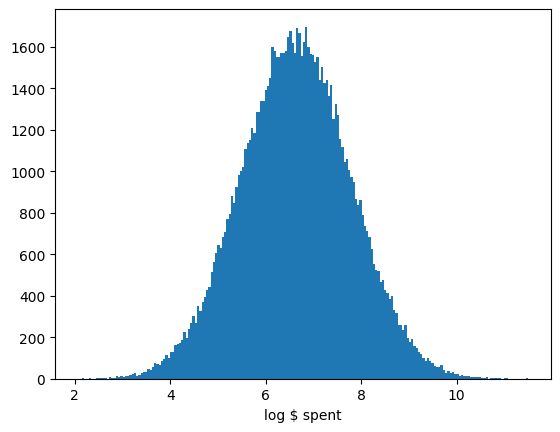



## FLOP ESTIMATE ##

25.43 log FLOP (80%CI: 23.89 to 26.97 log FLOP)

{1: 22.61,
 5: 23.46,
 10: 23.89,
 20: 24.42,
 30: 24.8,
 40: 25.13,
 50: 25.43,
 60: 25.74,
 70: 26.07,
 80: 26.45,
 90: 26.97,
 95: 27.41,
 99: 28.23}



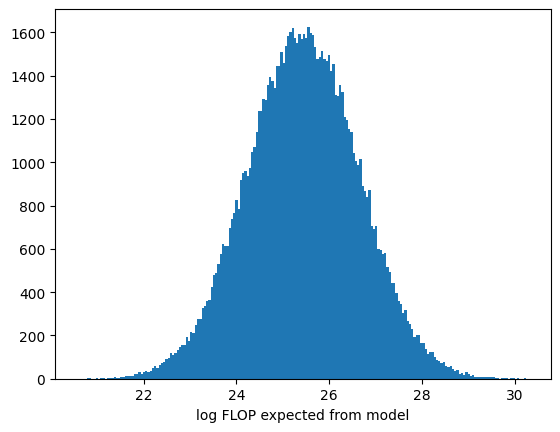

In [17]:
largest_china_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(100*M, 50*B, credibility=80),
                                                                        percent_r_and_d_on_ai=1,
                                                                        percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                        percent_compute_on_biggest_model=pct_dist(0.01, 0.1))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_china_gov_prediction = sq.dist_max(0, largest_china_gov_prediction - sq.norm(0.5, 1.5, lclip=0.05, rclip=1))

show_model_forecast(largest_china_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$21.7 million (80%CI: $3.0 million to $305.0 million)

{1: '1.4 million',
 5: '2.2 million',
 10: '3.0 million',
 20: '4.7 million',
 30: '6.7 million',
 40: '9.5 million',
 50: '14.0 million',
 60: '22.8 million',
 70: '43.8 million',
 80: '97.3 million',
 90: '305.0 million',
 95: '756.8 million',
 99: '3.7 billion'}



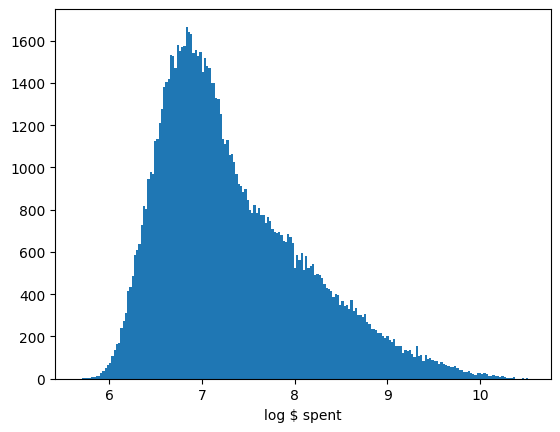



## FLOP ESTIMATE ##

26.14 log FLOP (80%CI: 25.14 to 27.35 log FLOP)

{1: 24.58,
 5: 24.93,
 10: 25.14,
 20: 25.4,
 30: 25.61,
 40: 25.8,
 50: 26.0,
 60: 26.23,
 70: 26.5,
 80: 26.85,
 90: 27.35,
 95: 27.77,
 99: 28.5}



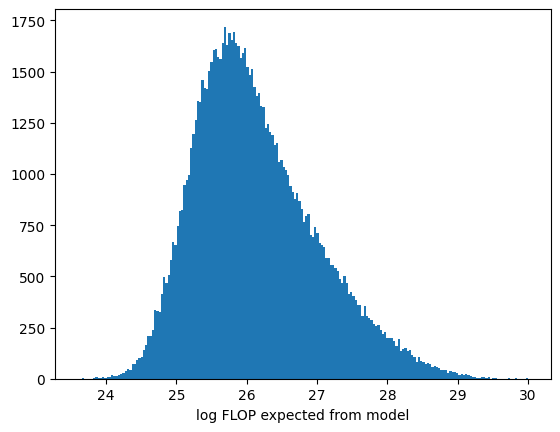

In [18]:
largest_arab_gov_prediction = bigtech_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(30*B, 50*B, credibility=80),
                                                                       percent_r_and_d_on_ai=1,
                                                                       percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                       percent_compute_on_biggest_model=pct_dist(0.0001, 0.05))

# Adjust China's "effective US-equivalent" spend by export controls and other things
largest_arab_gov_prediction = sq.dist_max(0, largest_arab_gov_prediction - sq.norm(0.05, 1, lclip=0.05, rclip=1))

show_model_forecast(largest_arab_gov_prediction @ (100*K))

## SPEND ESTIMATE ##

$980.3 million (80%CI: $337.3 million to $3.3 billion)

{1: '196.6 million',
 5: '275.0 million',
 10: '337.3 million',
 20: '449.7 million',
 30: '568.5 million',
 40: '705.2 million',
 50: '876.7 million',
 60: '1.1 billion',
 70: '1.4 billion',
 80: '2.0 billion',
 90: '3.3 billion',
 95: '5.2 billion',
 99: '13.6 billion'}



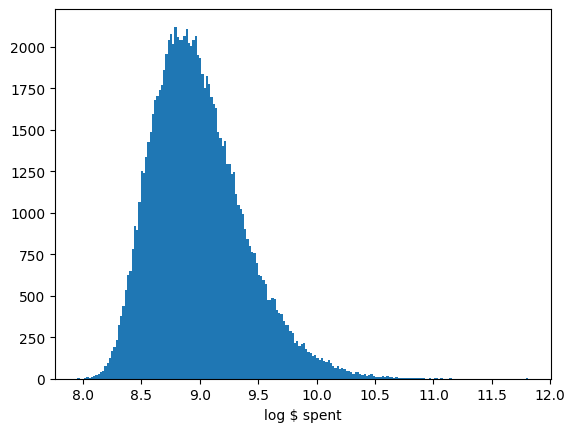



## FLOP ESTIMATE ##

27.79 log FLOP (80%CI: 27.12 to 28.49 log FLOP)

{1: 26.65,
 5: 26.96,
 10: 27.12,
 20: 27.34,
 30: 27.49,
 40: 27.63,
 50: 27.76,
 60: 27.9,
 70: 28.05,
 80: 28.23,
 90: 28.49,
 95: 28.72,
 99: 29.18}



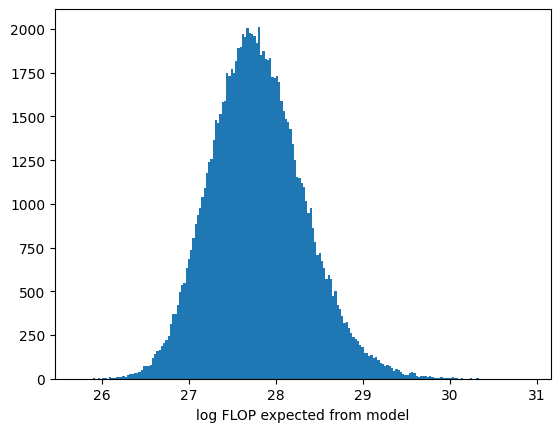

In [19]:
mixed_model = (largest_openai_model_prediction >>
               sq.dist_max(largest_anthropic_model_prediction) >>
               sq.dist_max(largest_mistral_model_prediction) >>
               sq.dist_max(largest_xai_model_prediction) >>
               sq.dist_max(largest_google_model_prediction) >>
               sq.dist_max(largest_microsoft_model_prediction) >>
               sq.dist_max(largest_fb_model_prediction) >>
               sq.dist_max(largest_amazon_model_prediction) >>
               sq.dist_max(largest_us_gov_prediction) >>
               sq.dist_max(largest_uk_gov_prediction) >>
               sq.dist_max(largest_arab_gov_prediction) >>
               sq.dist_max(largest_ssi_model_prediction) >>
               sq.dist_max(largest_china_gov_prediction))

show_model_forecast(mixed_model @ (100*K))

In [20]:
models = [['OpenAI', largest_openai_model_prediction],
          ['Anthropic', largest_anthropic_model_prediction],
          ['Mistral', largest_mistral_model_prediction],
          ['xAI', largest_xai_model_prediction],
          ['Google', largest_google_model_prediction],
          ['Microsoft', largest_microsoft_model_prediction],
          ['Meta', largest_fb_model_prediction],
          ['Amazon', largest_amazon_model_prediction],
          ['SSI', largest_ssi_model_prediction],
          ['US', largest_us_gov_prediction],
          ['UK', largest_uk_gov_prediction],
          ['Arab', largest_arab_gov_prediction],
          ['China', largest_china_gov_prediction]]

print('## % of having largest model at EOY2025 ##')
labels = [m[0] for m in models]
model_sizes_log = np.array([m[1] @ 100_000 for m in models])
max_indices = np.argmax(model_sizes_log, axis=0)
max_labels = [labels[i] for i in max_indices]
label_counts = Counter(max_labels)
label_percentages = {label: f"{round((count / 100_000) * 100, 1)}%" for label, count in Counter(max_labels).items()}
pprint(label_percentages)
print('')
print('')

print('## % of being at frontier (within 1 OOM of largest model) at EOY2025 ##')
max_log_sizes = np.max(model_sizes_log, axis=0)
within_one_OOM = (model_sizes_log >= (max_log_sizes - 1))
within_one_OOM_counts = np.sum(within_one_OOM, axis=1)
total_samples = model_sizes_log.shape[1]  # Total number of samples
label_percentages_within_one_OOM = {label: f"{round((count / total_samples) * 100, 1)}%" for label, count in zip(labels, within_one_OOM_counts)}
pprint(label_percentages_within_one_OOM)

## % of having largest model at EOY2025 ##
{'Amazon': '6.4%',
 'Anthropic': '6.0%',
 'Arab': '5.2%',
 'China': '2.5%',
 'Google': '18.6%',
 'Meta': '9.6%',
 'Microsoft': '4.4%',
 'Mistral': '1.5%',
 'OpenAI': '16.0%',
 'SSI': '3.7%',
 'US': '7.2%',
 'xAI': '18.8%'}


## % of being at frontier (within 1 OOM of largest model) at EOY2025 ##
{'Amazon': '36.6%',
 'Anthropic': '58.3%',
 'Arab': '22.4%',
 'China': '13.3%',
 'Google': '62.9%',
 'Meta': '39.3%',
 'Microsoft': '27.2%',
 'Mistral': '41.5%',
 'OpenAI': '74.8%',
 'SSI': '77.2%',
 'UK': '0.0%',
 'US': '31.3%',
 'xAI': '79.2%'}


## Cache spend model

Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 8.3,
 5: 8.4,
 10: 8.5,
 20: 8.6,
 30: 8.8,
 40: 8.8,
 50: 8.9,
 60: 9.0,
 70: 9.2,
 80: 9.3,
 90: 9.5,
 95: 9.7,
 99: 10.1}


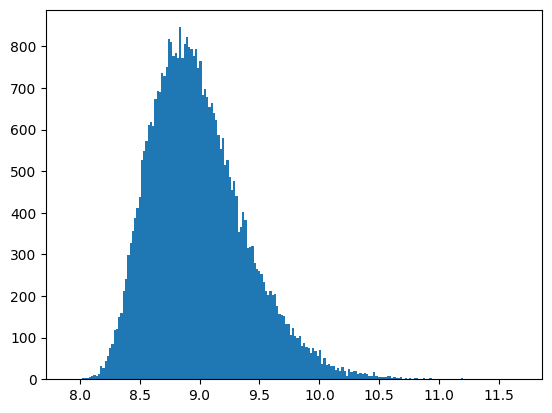

In [21]:
# Output expected willingness to pay for a model in 2025, using log 2022$USD
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()

## Appendix

## SPEND ESTIMATE ##

$5.0 billion (80%CI: $2.6 billion to $9.7 billion)

{1: '1.5 billion',
 5: '2.1 billion',
 10: '2.6 billion',
 20: '3.2 billion',
 30: '3.8 billion',
 40: '4.4 billion',
 50: '5.0 billion',
 60: '5.7 billion',
 70: '6.5 billion',
 80: '7.7 billion',
 90: '9.7 billion',
 95: '11.7 billion',
 99: '16.6 billion'}



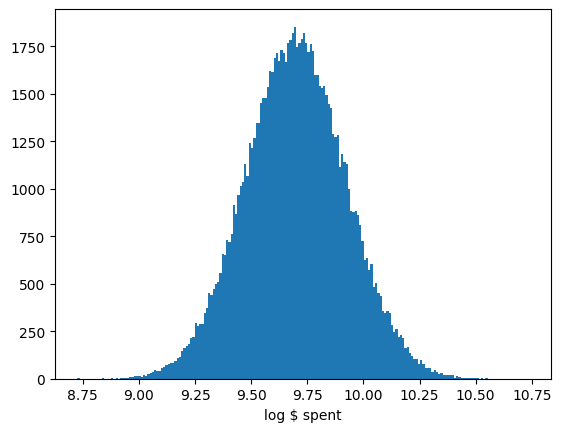



## FLOP ESTIMATE ##

28.5 log FLOP (80%CI: 27.95 to 29.04 log FLOP)

{1: 27.5,
 5: 27.79,
 10: 27.95,
 20: 28.14,
 30: 28.27,
 40: 28.39,
 50: 28.5,
 60: 28.6,
 70: 28.72,
 80: 28.86,
 90: 29.04,
 95: 29.2,
 99: 29.5}



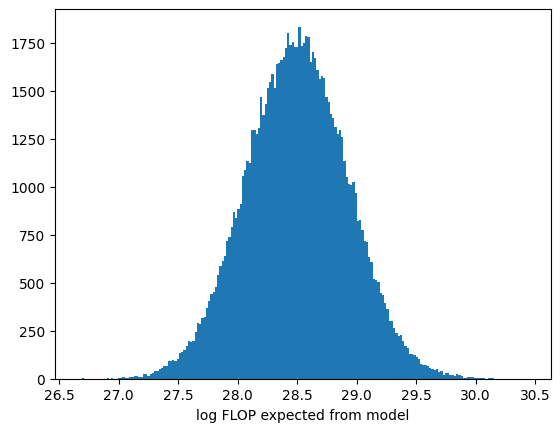

In [22]:
stargate = lab_spend_on_largest_model_this_year(total_investment=100*B,
                                                total_revenue=0,
                                                percent_investment_spent_this_year=1,
                                                percent_revenue_that_is_profit=0,
                                                percent_profit_spent_this_year=0,
                                                percent_spend_on_compute=pct_dist(mean=0.57, sd=0.12),
                                                percent_compute_on_biggest_model=pct_dist(mean=0.1, sd=0.05))
show_model_forecast(stargate @ (100*K))

In [23]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-09-12 11:47:59.993710
